<a href="https://colab.research.google.com/github/bigirimanainnocent12/ANOVA/blob/main/prix_de_l'immobilier_en_fonction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Description des variables de l'étude
---

Le marché immobilier est un domaine d'une importance capitale, influencé par de multiples facteurs économiques, sociaux et environnementaux. Dans le cadre de cette étude, nous nous intéressons à la prédiction du prix de l'immobilier à Paris, un exercice essentiel pour divers acteurs du secteur immobilier, tels que les promoteurs, les investisseurs et les décideurs politiques.

Utiliser des modèles prédictifs pour estimer la valeur des maisons peut fournir des informations précieuses pour mieux comprendre les dynamiques du marché et anticiper les fluctuations des prix.

La base de données est composée par 17 variables qui sont:

1. squareMeters: Taille de la maison en mètres carrés
2. numberOfRooms: Nombre de pièces de la maison
3. hasYard: La maison comprend-elle un jardin ? 0 - non, 1 - oui
4. hasPool: La maison comprend-elle une piscine ? 0 - non, 1 - oui
5. floors: Combien y a-t-il d'étages?
6. cityCode: Numéro de code postal
7. cityPartRange: plus la gamme est élevée, plus le quartier est exclusif de 0 à 10
8. numPrevOwners: Nombre de propriétaires précédents
9. made: Année de  fabrication
10. isNewBuilt:Est-ce neuf ou rénové? 0 - non, 1 - oui
11. aStormProtector:
12. basement: Mètres carrés du sous-sol
13. attic : mètres carrés de grenier
14. garage : Taille du garage
15. hasStorageRoom:
16. hasGuestRoom: Nombre de chambres d'hôtes
17. price: valeur prédite

En combinant ces caractéristiques, cette étude vise à développer un modèle de régression performant pour prédire les prix de l'immobilier à Paris.

[Lien pour la base de données](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction)


# **Importation des bibliothèques**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

# **Importation de la base de données**

In [ ]:
import kagglehub


CHEMIN = kagglehub.dataset_download("mssmartypants/paris-housing-price-prediction")

print("Path to dataset files:", CHEMIN)


for filename in os.listdir(CHEMIN):
    if filename.endswith(".csv"):

        csv_file_path = os.path.join(CHEMIN, filename)
        break

# Lire le fichier CSV
df = pd.read_csv(csv_file_path)
df.head()

Path to dataset files: /kaggle/input/paris-housing-price-prediction


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


# **Informations sur les variables**

In [ ]:
df[["hasYard","hasPool","isNewBuilt","hasStormProtector","hasStorageRoom"]]=df[["hasYard","hasPool","isNewBuilt","hasStormProtector","hasStorageRoom"]].astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  bool   
 3   hasPool            10000 non-null  bool   
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  bool   
 10  hasStormProtector  10000 non-null  bool   
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  bool   
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

# **Vérifications des valeurs manquantes**

In [ ]:
df[df.isnull().any(axis=1)]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price


# **Statistiques Déscriptives par variables**

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
basement,10000.0,5.033104e+03,2.876730e+03,0.0,2559.75,5092.5,7511.25,10000.0
attic,10000.0,5.028011e+03,2.894332e+03,1.0,2512.00,5045.0,7540.50,10000.0
garage,10000.0,5.531212e+02,2.620502e+02,100.0,327.75,554.0,777.25,1000.0


# ***Visualiser les corrélations entre les variables***

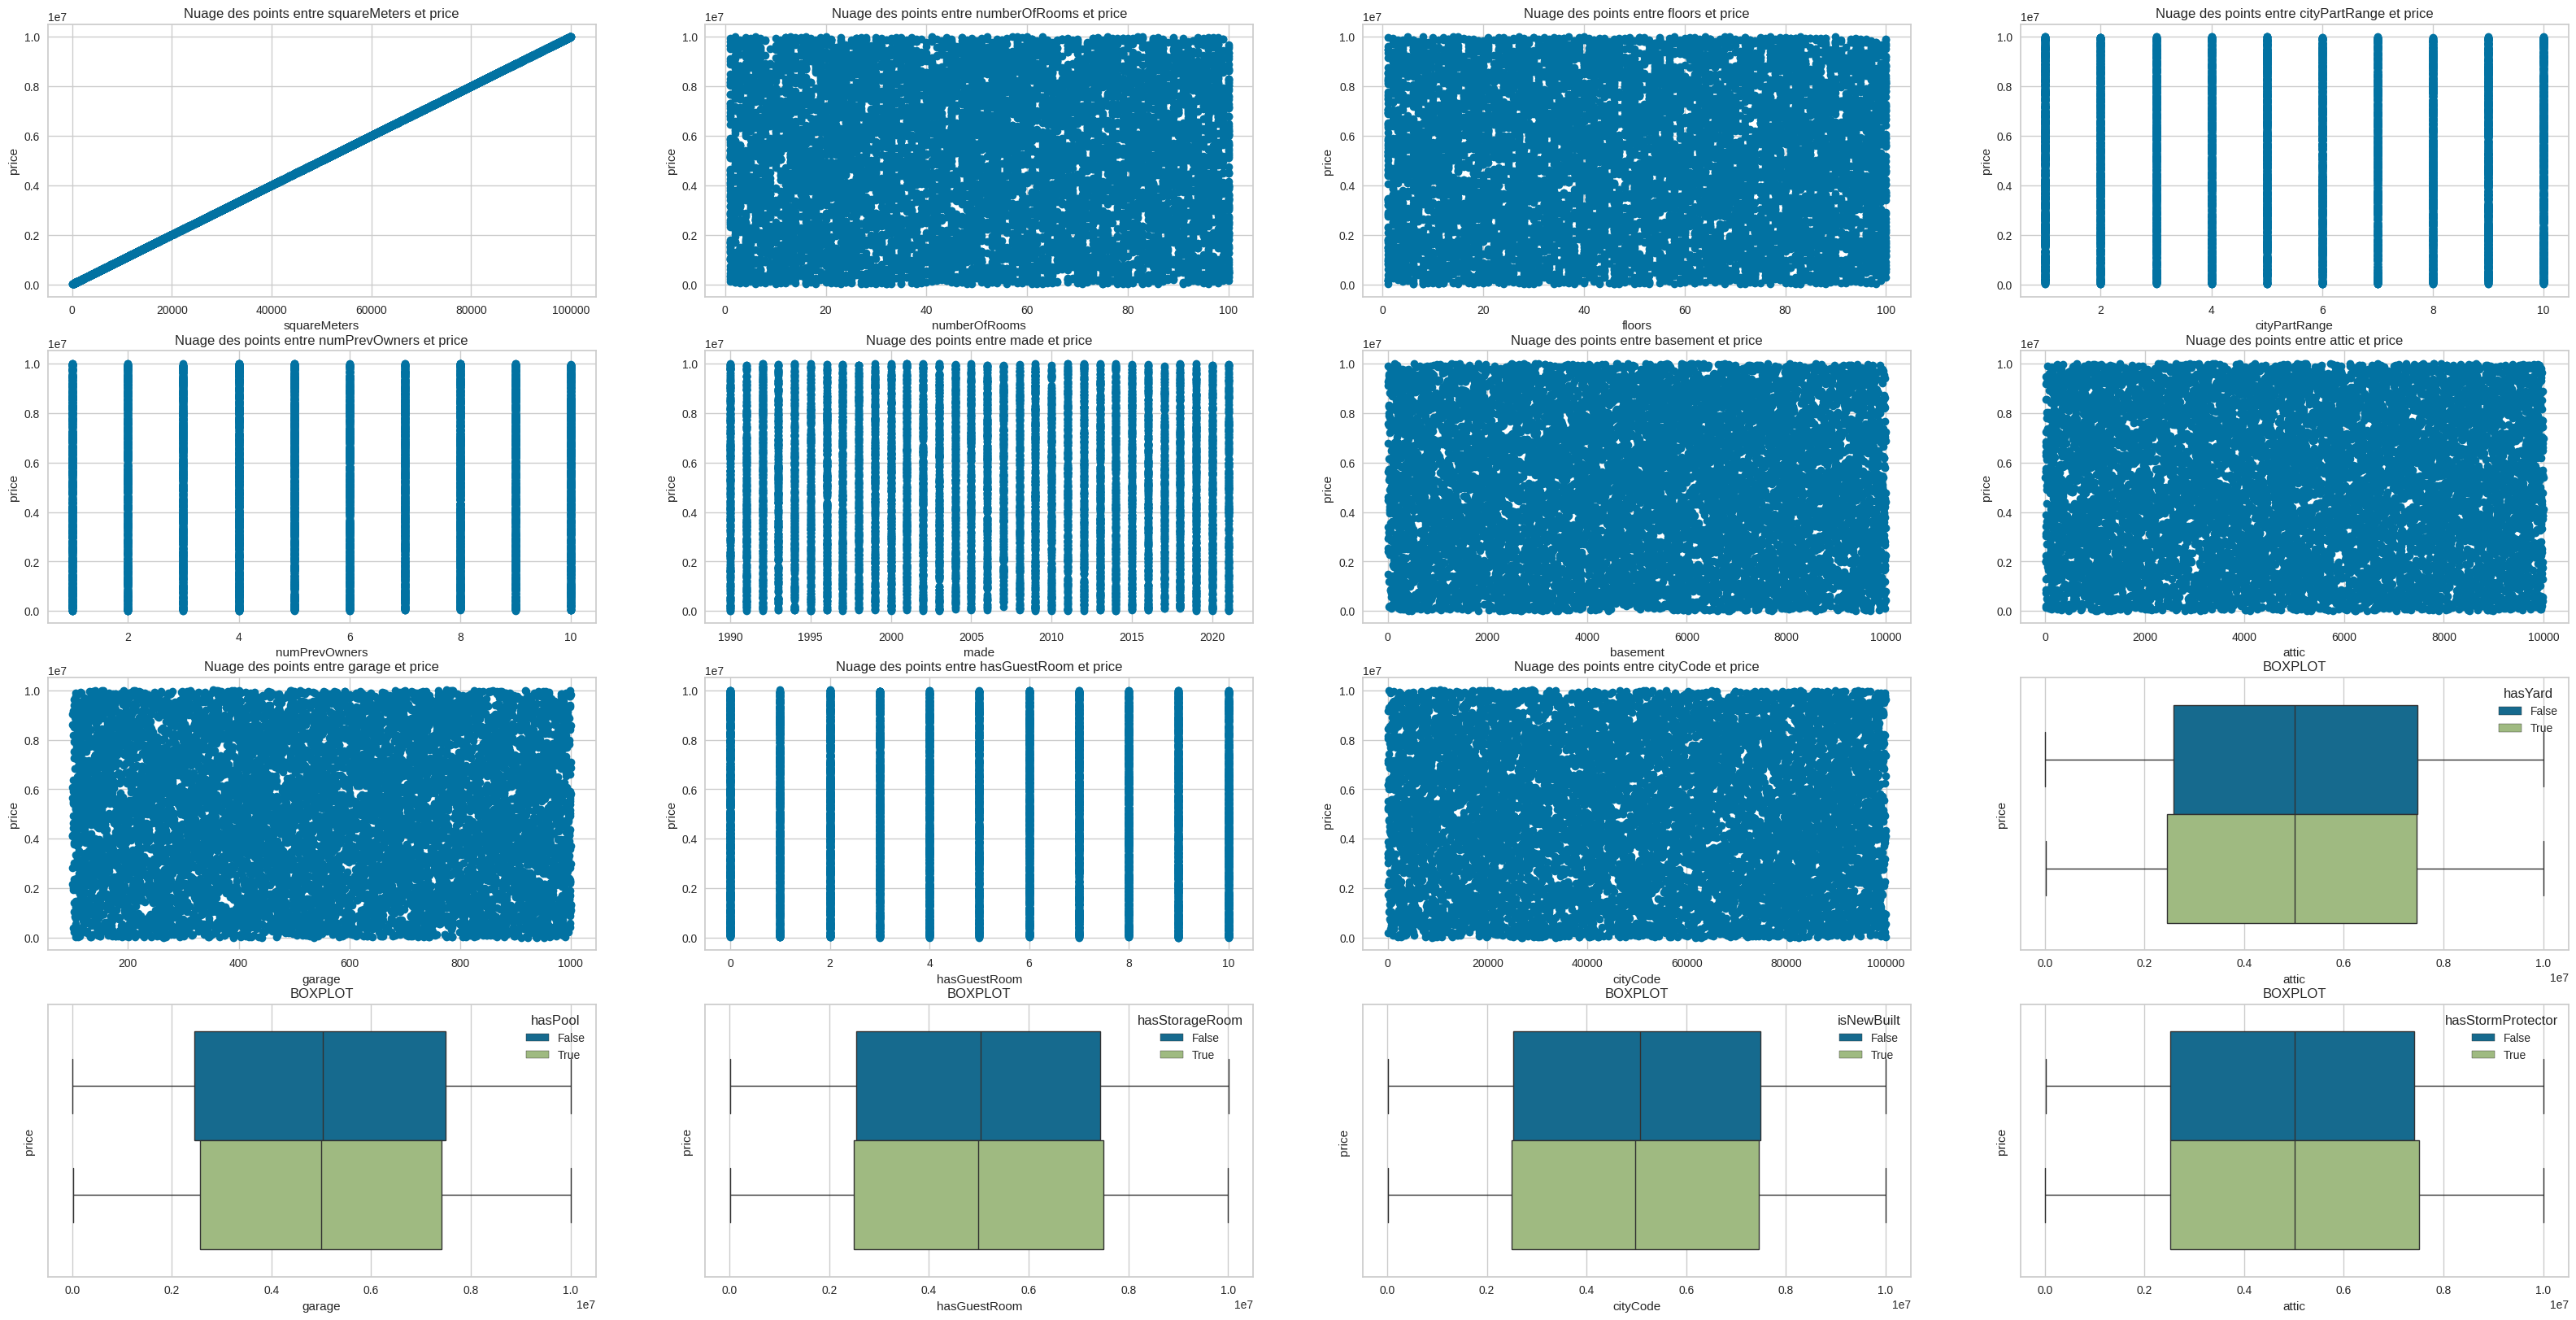

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(40,20))
axes[0][0].plot(df['squareMeters'],df['price'],'o')
axes[0][0].set_ylabel('price')
axes[0][0].set_xlabel('squareMeters')
axes[0][0].set_title('Nuage des points entre squareMeters et price')

axes[0][1].plot(df['numberOfRooms'],df['price'],'o')
axes[0][1].set_ylabel('price')
axes[0][1].set_xlabel('numberOfRooms')
axes[0][1].set_title('Nuage des points entre numberOfRooms et price')

axes[0][2].plot(df['floors'],df['price'],'o')
axes[0][2].set_ylabel('price ')
axes[0][2].set_xlabel('floors')
axes[0][2].set_title('Nuage des points entre floors et price')

axes[0][3].plot(df['cityPartRange'],df['price'],'o')
axes[0][3].set_ylabel('price')
axes[0][3].set_xlabel('cityPartRange')
axes[0][3].set_title('Nuage des points entre cityPartRange et price')


axes[1][0].plot(df['numPrevOwners'],df['price'],'o')
axes[1][0].set_ylabel('price')
axes[1][0].set_xlabel('numPrevOwners')
axes[1][0].set_title('Nuage des points entre numPrevOwners et price')

axes[1][1].plot(df['made'],df['price'],'o')
axes[1][1].set_ylabel('price')
axes[1][1].set_xlabel('made')
axes[1][1].set_title('Nuage des points entre made et price')

axes[1][2].plot(df['basement'],df['price'],'o')
axes[1][2].set_ylabel('price ')
axes[1][2].set_xlabel('basement')
axes[1][2].set_title('Nuage des points entre basement et price')

axes[1][3].plot(df['attic'],df['price'],'o')
axes[1][3].set_ylabel('price')
axes[1][3].set_xlabel('attic')
axes[1][3].set_title('Nuage des points entre attic et price')



axes[2][0].plot(df['garage'],df['price'],'o')
axes[2][0].set_ylabel('price')
axes[2][0].set_xlabel('garage')
axes[2][0].set_title('Nuage des points entre garage et price')

axes[2][1].plot(df['hasGuestRoom'],df['price'],'o')
axes[2][1].set_ylabel('price')
axes[2][1].set_xlabel('hasGuestRoom')
axes[2][1].set_title('Nuage des points entre hasGuestRoom et price')

axes[2][2].plot(df['cityCode'],df['price'],'o')
axes[2][2].set_ylabel('price ')
axes[2][2].set_xlabel('cityCode')
axes[2][2].set_title('Nuage des points entre cityCode et price')

sns.boxplot(x="price",data=df,hue="hasYard",ax=axes[2][3])
axes[2][3].set_ylabel('price')
axes[2][3].set_xlabel('attic')
axes[2][3].set_title('BOXPLOT')


sns.boxplot(x="price",data=df,hue="hasPool",ax=axes[3][0])
axes[3][0].set_ylabel('price')
axes[3][0].set_xlabel('garage')
axes[3][0].set_title('BOXPLOT')

sns.boxplot(x="price",data=df,hue="hasStorageRoom",ax=axes[3][1])
axes[3][1].set_ylabel('price')
axes[3][1].set_xlabel('hasGuestRoom')
axes[3][1].set_title('BOXPLOT')

sns.boxplot(x="price",data=df,hue="isNewBuilt",ax=axes[3][2])
axes[3][2].set_ylabel('price ')
axes[3][2].set_xlabel('cityCode')
axes[3][2].set_title('BOXPLOT')

sns.boxplot(x="price",data=df,hue="hasStormProtector",ax=axes[3][3])
axes[3][3].set_ylabel('price')
axes[3][3].set_xlabel('attic')
axes[3][3].set_title('BOXPLOT')
plt.show()

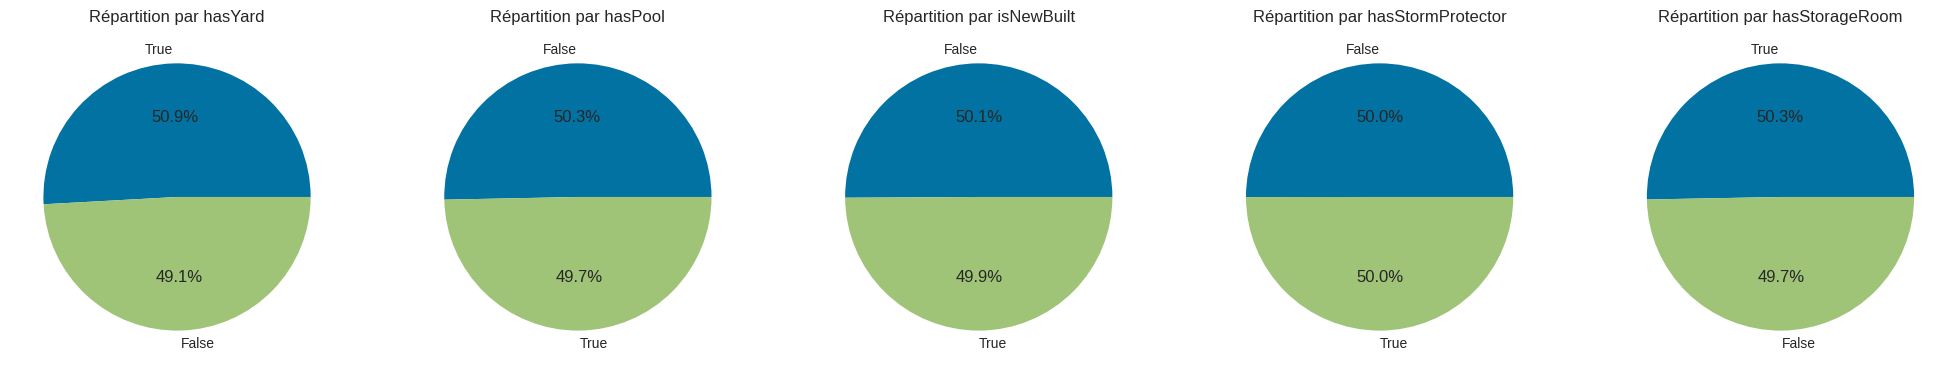

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(25,10))

axes[0].pie(df["hasYard"].value_counts(),labels=df["hasYard"].value_counts().index,autopct='%1.1f%%')
axes[0].set_title('Répartition par hasYard')

axes[1].pie(df["hasPool"].value_counts(),labels=df["hasPool"].value_counts().index,autopct='%1.1f%%')
axes[1].set_title('Répartition par hasPool')

axes[2].pie(df["isNewBuilt"].value_counts(),labels=df["isNewBuilt"].value_counts().index,autopct='%1.1f%%')
axes[2].set_title('Répartition par isNewBuilt')


axes[3].pie(df["hasStormProtector"].value_counts(),labels=df["hasStormProtector"].value_counts().index,autopct='%1.1f%%')
axes[3].set_title('Répartition par hasStormProtector')

axes[4].pie(df["hasStorageRoom"].value_counts(),labels=df["hasStorageRoom"].value_counts().index,autopct='%1.1f%%')
axes[4].set_title('Répartition par hasStorageRoom')

plt.show()

# **Visualiser les corrélations entre les variables**

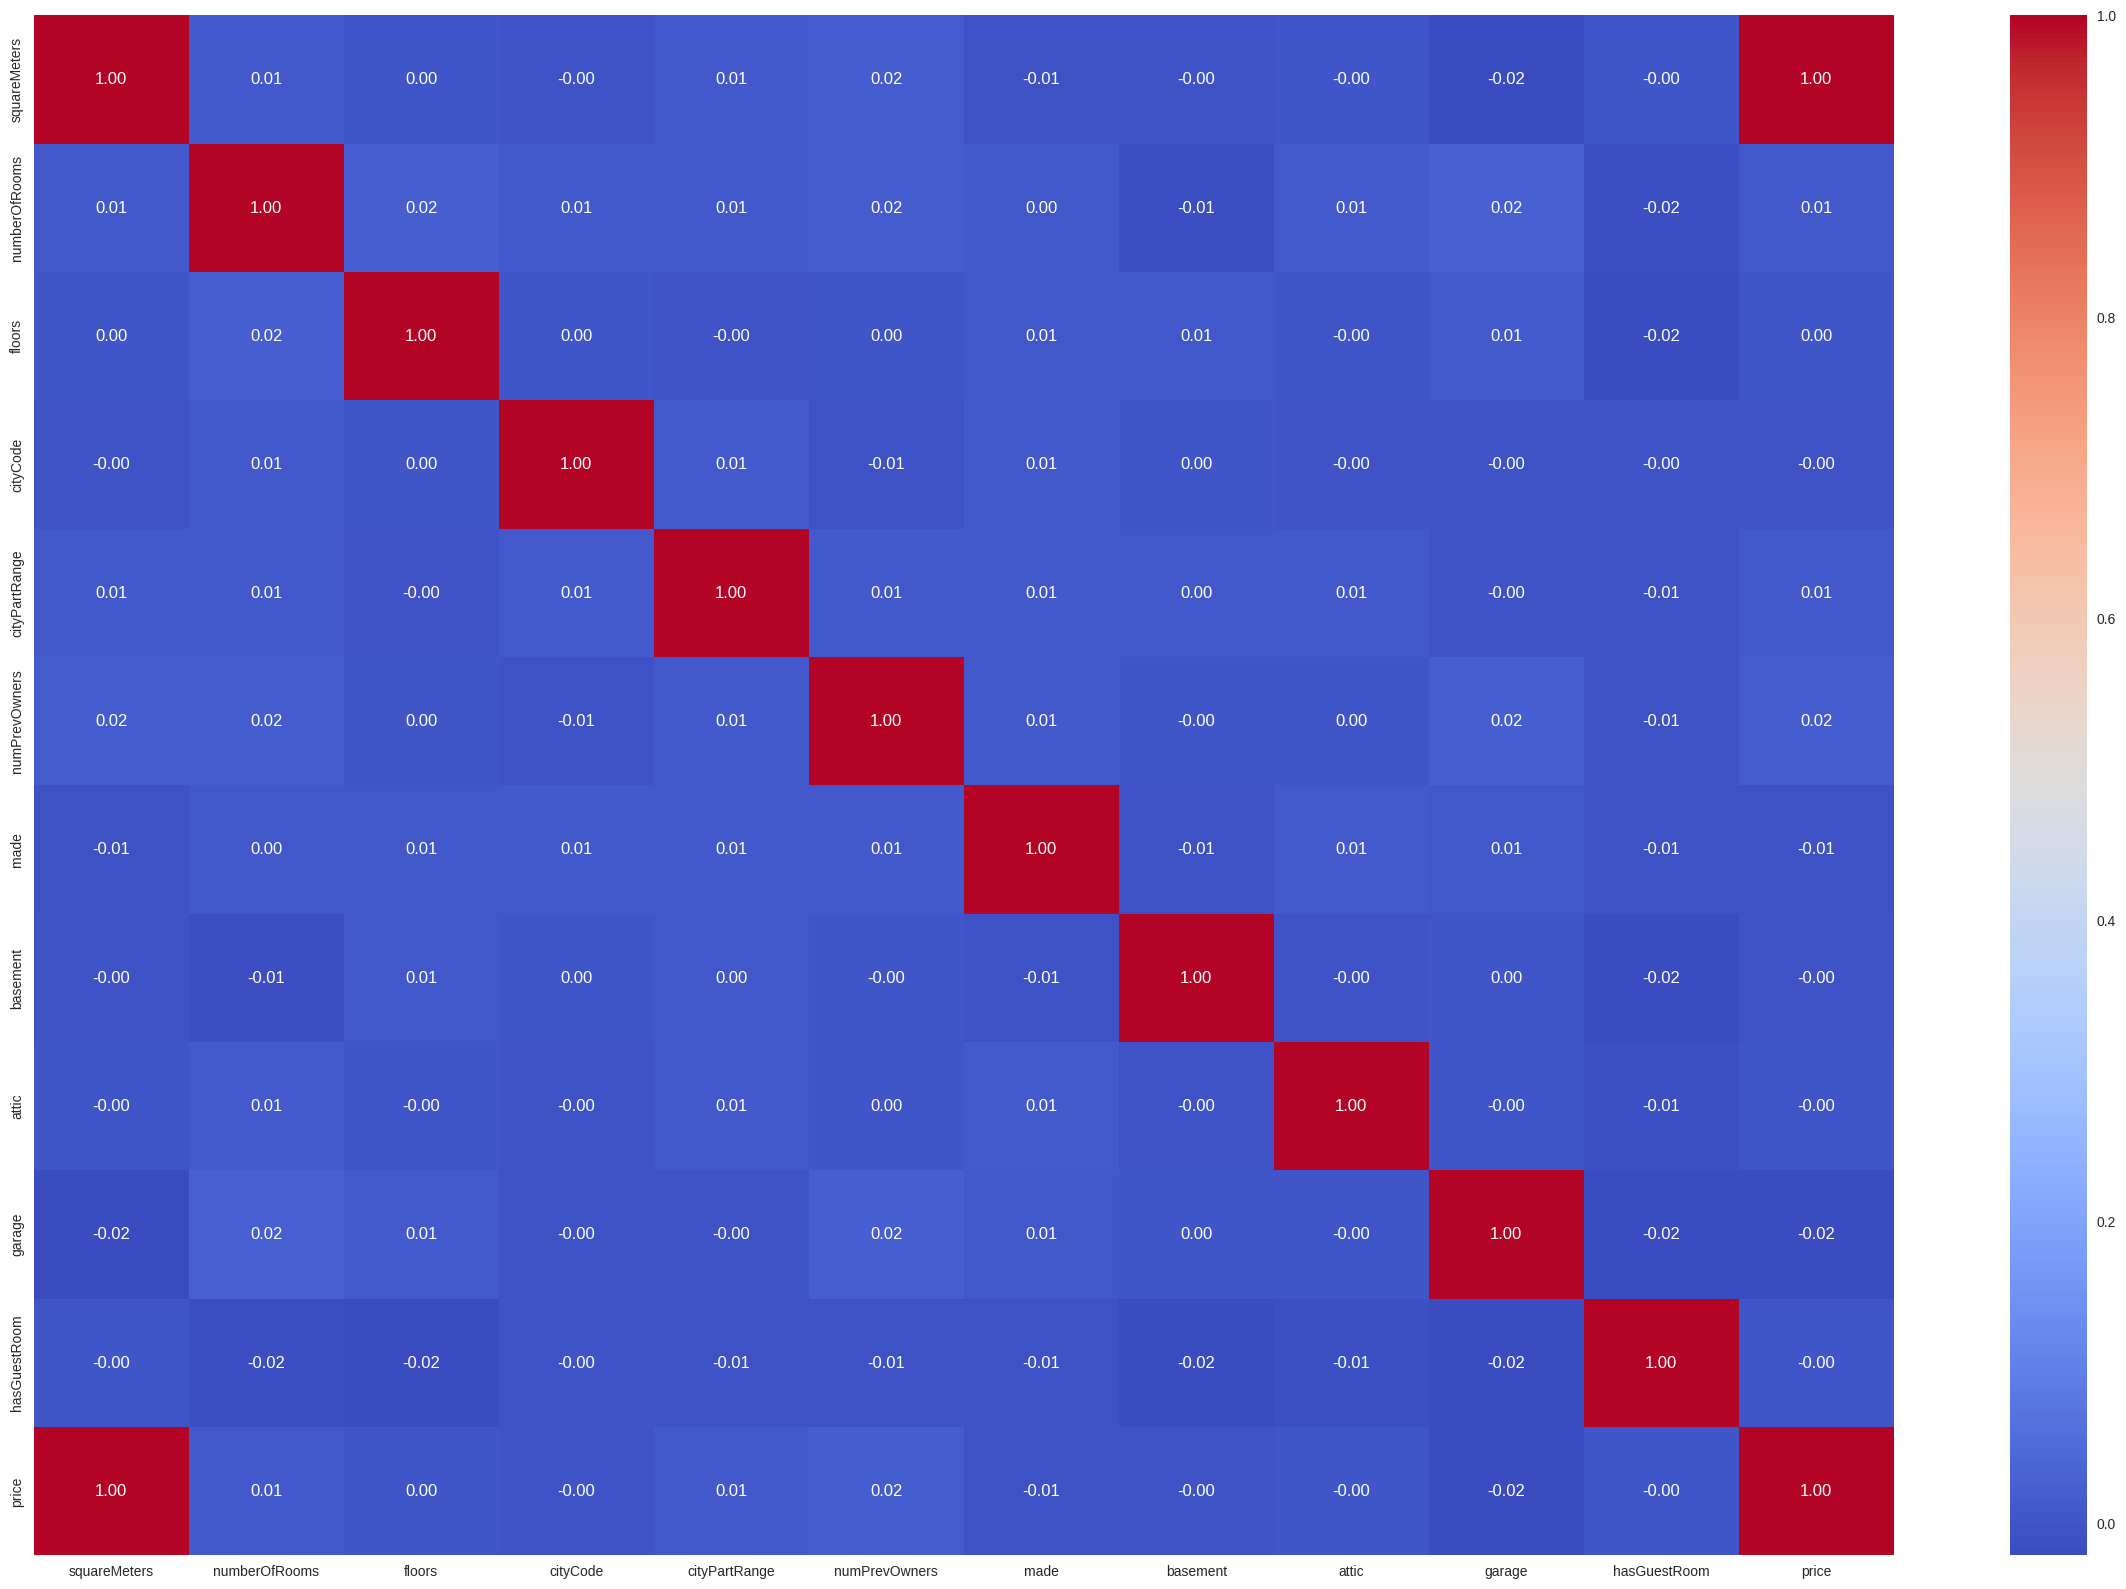

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.select_dtypes(include=['float','int64']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# ***Modèle de machine learning: Régression linéaire multiple***

*Séparation de données entre deux ensembles:*
- Un ensemble pour l'entraînement
- Un ensemble pour le test

In [ ]:
X=df.drop('price',axis=1)
y=df['price']

# **Mise à l'échelle des données et Entrainement du modèle**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def binary_transformer(x):
    return x.astype(int)

preprocessor= ColumnTransformer(
    transformers=[
        ('scaling',StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('binary', FunctionTransformer(binary_transformer, validate=False), X.select_dtypes(include=['bool']).columns)

    ]
)


model = make_pipeline(
    preprocessor,
    LinearRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  Index(['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange',
       'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasGuestRoom'],
      dtype='object')),
                                                 ('binary',
                                                  FunctionTransformer(func=<function binary_transformer at 0x7b5ef52262a0>),
                                                  Index(['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector',
       'hasStorageRoom'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

# Prédiction

In [ ]:
prediction=model.predict(X_test)

# Evaluation des performances du modèle

In [ ]:
Rmse=mean_squared_error(y_test,prediction)
print(f'Erreur quadratique moyenne Test: {Rmse}')

r2=r2_score(y_test,prediction)
print(f'Coefficient de détermination: {round(r2*100,2)}')

mea=mean_absolute_error(y_test,prediction)
print(f'Erreur absolue moyenne Test: {mea}')

MAPE=mean_absolute_percentage_error(y_test,prediction)
print(f'Erreur absolue moyenne en pourcentage: {MAPE}')

Erreur quadratique moyenne Test: 3605360.3566409303
Coefficient de détermination: 100.0
Erreur absolue moyenne Test: 1485.208039550274
Erreur absolue moyenne en pourcentage: 0.0009648280328065712


# Evaluations des résidus

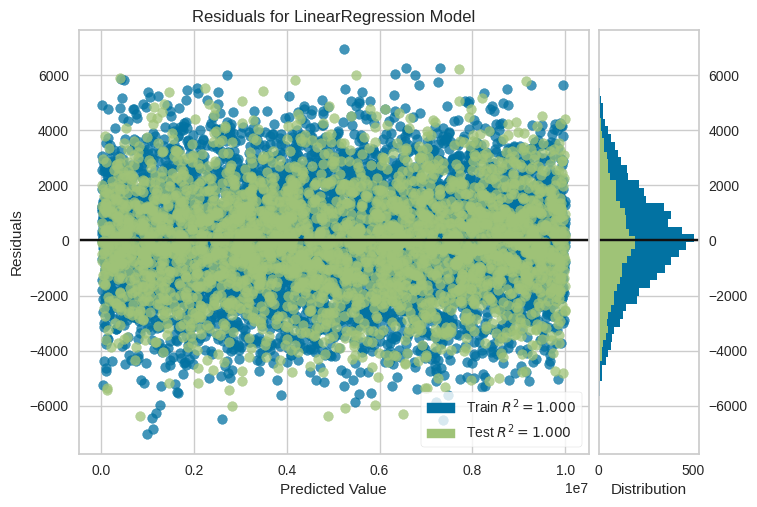

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot, prediction_error
resisdu=ResidualsPlot(model)
resisdu.fit(X_train,y_train)
resisdu.score(X_test,y_test)
resisdu.show()

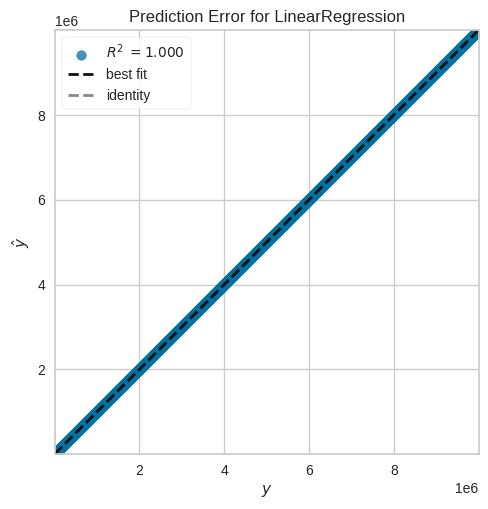

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import prediction_error
error = prediction_error(model, X_train, y_train)

error.score(X_test, y_test)
error.show()

# **Sauvegarder le modèle**

In [ ]:
import joblib

In [ ]:
loaded_model=joblib.dump(model,'model.pkl')

# **Coefficient du modèle**

In [ ]:
import joblib
loaded_model = joblib.load('model.pkl')
loaded_model.named_steps['linearregression'].coef_

array([ 2.85752438e+06,  1.63472674e+01,  1.57720833e+03, -2.21894721e+01,
        1.51798221e+02,  4.41260418e+00, -3.27568967e+01, -1.15443356e+01,
       -2.00221151e+01,  2.15092110e+01, -2.08071299e+01,  3.00639668e+03,
        3.00046503e+03,  1.17280457e+02,  1.05928525e+02,  4.43056144e+01])

# **Campagne**

Nous organisons une campagne pour prédire le prix de l'immobilier à Paris ayant:

1. squareMeters: Taille de la maison en mètres carrés(34000)
2. numberOfRooms: Nombre de pièces de la maison (4)
3. hasYard: La maison comprend-elle un jardin ?(oui)
4. hasPool: La maison comprend-elle une piscine ?(oui)
5. floors: Combien y a-t-il d'étages? (5)
6. cityCode: Numéro de code postal (9373)
7. cityPartRange: plus la gamme est élevée, plus le quartier est exclusif(6)
8. numPrevOwners: Nombre de propriétaires précédents (7)
9. made: Année de  fabrication (2010)
10. isNewBuilt:Est-ce neuf ou rénové? (Non)
11. aStormProtector: (oui)
12. basement: Mètres carrés du sous-sol(5090)
13. attic : mètres carrés de grenier (4500)
14. garage : Taille du garage(680)
15. hasStorageRoom:(Non)
16. hasGuestRoom: Nombre de chambres d'hôtes(5)


In [ ]:
from pickle import TRUE
campaign=[[34000,4,True,True,5,9373,6,7,2010,False,True,5090,4500,680,False,5]]
x_cols=X.columns
campagne=pd.DataFrame(campaign,columns=x_cols)
campagne

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34000,4,True,True,5,9373,6,7,2010,False,True,5090,4500,680,False,5


La maison sera estimé à

In [ ]:
print(round(loaded_model.predict(campagne)[0],2),"$")

3406944.0 $
